In [1]:
import pandas as pd
import numpy as np 
from konlpy.tag import Komoran
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image



In [2]:



df = pd.read_excel('../data/야인시대 1부 (1~50) 통합대본.xlsx')
df2 = pd.read_excel('../data/야인시대 2부(51~124) 통합대본.xlsx')
df= pd.concat([df, df2], axis=0)
df = df[df["인물"].str.startswith("#") == False]
people=list(df["인물"].value_counts()[:50].index) # 대사가 많은 인물만 추리기 


# 두한, 청년두한, 소년두한
# 정진영, 청년진영 
# 개코, 소년개코 
# 해당 인물을 같은 라벨로 표시하기 : replace사용
replace_dict = {
    "청년두한": "두한",
    "소년두한": "두한",
    "청년진영": "정진영",
    "청년개코": "개코"
}

df["인물"] = df["인물"].replace(replace_dict)
df["인물"].value_counts()[:50]

df=df[df["인물"]=="정진영"].reset_index(drop=True)
df.to_csv('../data/야인시대.csv', index=False)
feature = df["대사"]


In [3]:
from konlpy.tag import Komoran
from collections import Counter

# 데이터 토큰화 및 단어 사전 구축 
def build_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()
    for tokens in corpus:
        counter.update(tokens)
    vocab = special_tokens
    for token, count in counter.most_common(n_vocab):
        vocab.append(token)
    return counter


tokenizer = Komoran()
train_tokens = [tokenizer.morphs(review) for review in feature]

vocab = build_vocab(corpus=train_tokens, n_vocab=2000, special_tokens=["<pad>", "<unk>"])


In [4]:
vocab=dict(vocab.most_common())
vocab = {key: value for key, value in vocab.items() if len(key) >= 2}
stop_words = ["...", "습니다", "ㅂ니다", "그렇", "아니", "우리", "아서", "그래", "으로", "습니까", "라고", "어서", "지금", "에서", "어요", "ㄴ가", "아야", "어떻", "..", "무슨", "그것", "ㅂ니까", "이렇", "그리고", "다고", "그런", "는데", "정말", "여기", "까지", "이것", "모르", "어야", "구만", "이제", "얘기", "ㅂ시오", "ㄴ다", "니까", "지만", "에게", "어디", "오늘", "나라", "도록", "위하", "못하", "고맙", "그만", "다시", "누구", "하지만", "만나", "ㅂ시다", "라는", "말씀", "제가", "다는", "으면", "께서", "부터", "그럼", "너무", "아주", "다면", "마시", "들어가", "이런", "ㅂ쇼", "모두", "ㄴ데", "나오", "아직", "이나", "죽이", "이야", "한테", "드리", "지요", "아이", "아라", "으시", "이미", "많이", "아요", "하하", "필요", "가지", "그러", "이번", "때문", "처럼", "해보", "시키", "대로", "어쩌", "그래도", "아도", "ㄴ다고", "그냥", "아무튼", "보다", "너희", '절대', '바로', '자고', '다가', '이란', '았었', 'ㄴ다는', '다니', '없이', '이건',
    '만들', '면서', '다음', '으니까', '구나', 'ㄴ지', '먼저', '지마는', '다르', '바쁘',
    '아니야', '으니', '에요', '일단', '그러나', '거지', '아무래도', '근데', '려고', '도대체',
    'ㄹ까', '잖아', '라니', '조금', '하고', '부르', '헌데', '부르', '얼마', '라구',
    '그래요', '얼마나', '예요', '어라', '떠나', '하나', '으니', '보내', '물론', '거기',
    'ㄴ다면', '거든', '어야지', '그때', '같이', '지키', '자구','들어오', '여러', '취하', '사람', '언제', '자는', '기다리', '다녀오', '는가', '끝나',
    '계속', '라도', '이기', '당신', '라면', '시간', '이유', '할아버지', '계시', '나서',
    '사실', '밖에', '배우', '모든', '잠시', '이름', '자리', '지나', '지내', '요즘',
    '돌아오', '자리', '중요', '는지', '반드시', '그래서', 'ㄴ단', '분명', '돌아가', '어떤',
    '약속', '다행', '그런데']

# stop_words에 해당하지 않는 키값만 딕셔너리로 만들기 
vocab = {key: value for key, value in vocab.items() if key not in stop_words}
vocab

{'동무': 136,
 '생각': 59,
 '김두한': 49,
 '형님': 38,
 '친구': 27,
 '개코': 26,
 '종로': 26,
 '어렵': 25,
 '소리': 25,
 '공산당': 24,
 '어머니': 22,
 '잘못': 20,
 '김해숙': 20,
 '영태': 19,
 '동지': 19,
 '이상': 17,
 '우익': 17,
 '걱정': 16,
 '우미관': 16,
 '이야기': 16,
 '나가': 16,
 '마루': 16,
 '마음': 16,
 '세상': 15,
 '싸우': 15,
 '대장': 15,
 '어차피': 15,
 '참모장': 15,
 '을까': 14,
 '당하': 14,
 '털보': 14,
 '부탁': 14,
 '함께': 14,
 '괜찮': 14,
 '버리': 14,
 '일본': 14,
 '인민': 14,
 '하야시': 14,
 '경찰': 14,
 '대원': 14,
 '정진영': 13,
 '오야': 13,
 '준비': 13,
 '경부': 13,
 '김천호': 13,
 '만주': 12,
 '방법': 12,
 '조선': 12,
 '아저씨': 11,
 '알아보': 11,
 'ㄹ게': 11,
 '쌍칼': 11,
 '주먹': 11,
 '마지막': 11,
 '용서': 11,
 '목숨': 11,
 '전위': 11,
 '심영': 11,
 '글쎄': 10,
 '대하': 10,
 '빨리': 10,
 '걸리': 10,
 '모양': 10,
 '한인': 10,
 '소식': 10,
 '보이': 10,
 '아마': 9,
 '오래': 9,
 '싸움': 9,
 '생기': 9,
 '내일': 9,
 '리가': 9,
 '저희': 9,
 '연락': 9,
 '상대': 9,
 '전화': 9,
 '문제': 9,
 '신불출': 9,
 '박헌영': 9,
 '박용': 9,
 '전위대': 9,
 '명령': 9,
 '낙원': 9,
 '별동대': 9,
 '기자': 8,
 '고생': 8,
 '분명히': 8,
 '구마': 8,
 '혹시': 8,
 '정신': 8,
 '처음': 8,
 '하하

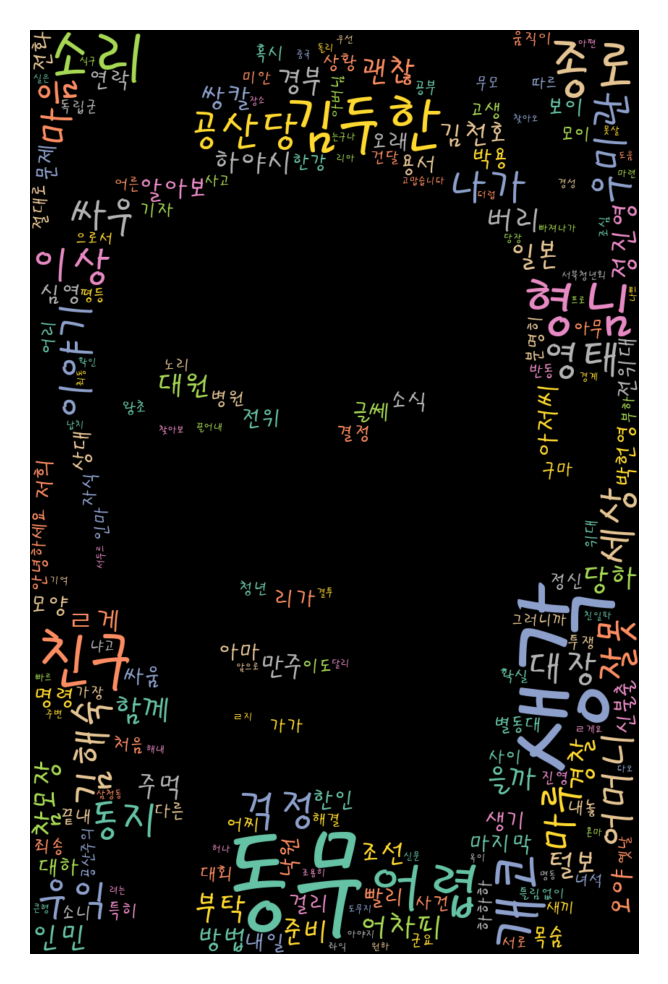

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 이미지 로드
image_mask = np.array(Image.open("jinyoung2.png"))  # 이미지 경로를 적절히 변경하세요.

# 이미지를 워드클라우드에 적용
wordcloud = WordCloud(font_path=r'c:\Windows\Fonts\HMFMPYUN.TTF', background_color='black', colormap='Set2', mask=image_mask, repeat=True).generate_from_frequencies(vocab)

# 고화질로 렌더링
plt.figure(figsize=(8, 4), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


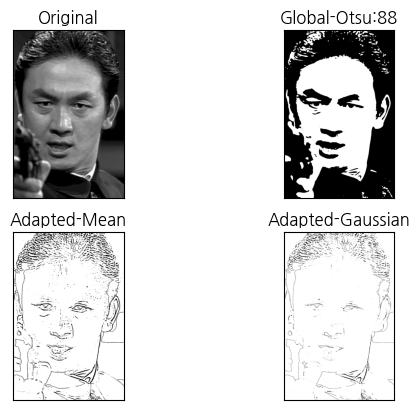

In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('./jinyoung.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2.imwrite('jinyoung2.png', th1)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()
